# Smoothing Time-series
Feb 22nd 2022

In [11]:
import sys
print(sys.executable)
import numpy as np
import pandas as pd
import os
print(os.getcwd())
import matplotlib.pyplot as plt
# %matplotlib inline
import seaborn as sns
from IPython.display import display
import statsmodels as ss
from sklearn.metrics import mean_squared_error
from src.timeseriesFunctions import plot_time_series, chunks_statistics
SEED= 42
pd.options.display.float_format = '{:,.2f}'.format
sns.set_context("paper", font_scale= 1.5)
plt.rcParams['axes.spines.right']= False
plt.rcParams['axes.spines.top']= False
plotsize = (13, 5)
plt.rcParams['figure.figsize']= plotsize

/home/razielar/miniconda3/envs/time-series/bin/python
/home/razielar/Documents/git_rep/Machine_learning/time_series_forecasting/coursera_time_series/week_2/2_time_series_smoothing


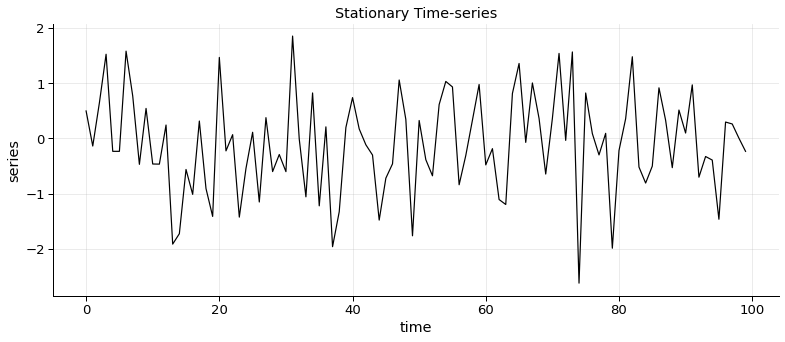

In [10]:
np.random.seed(SEED)

time= np.arange(100)
stationarity= np.random.normal(loc= 0, scale= 1.0, size= len(time))
plot_time_series(time, stationarity, title= "Stationary Time-series")

## Smoothing techniques in this nb
* 1) Simple smoothing (average)
* 2) MA= moving average (equally-weighted and exponentially-weighted)
* 3) Exponential Smoothing (single exponential smoothing, double and triple exponential smoothing)

## 1) Simple smoothing (average)

MSE: 0.8165


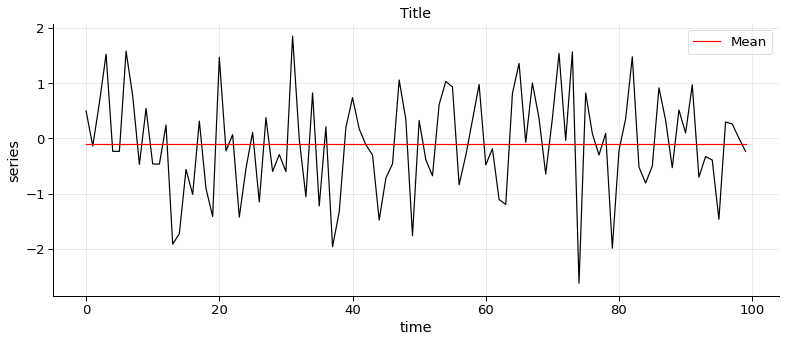

In [29]:
stationary_av= np.mean(stationarity)
sts_avg= np.full(shape= len(time), fill_value= stationary_av, dtype= 'float')
print("MSE: {:.4f}".format(mean_squared_error(stationarity, sts_avg))) 
plot_time_series(time, stationarity)
plt.plot(time, sts_avg, label= "Mean", color= "red")
plt.legend()
plt.show()

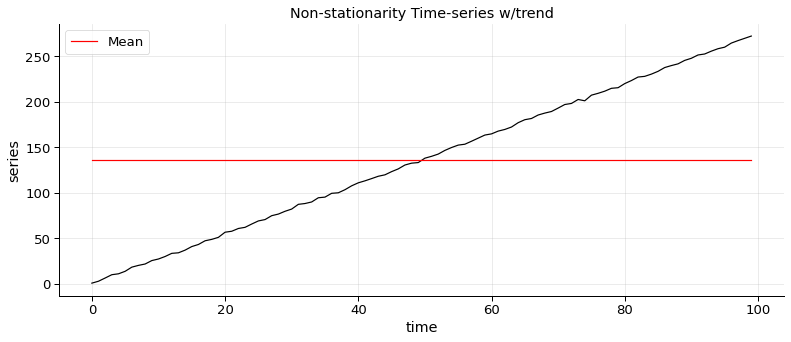

In [36]:
# Trend
trend= (time * 2.75) + stationarity
trend_avg= np.full(shape= len(time), fill_value= np.mean(trend), dtype= "float")
plot_time_series(time, trend, title= "Non-stationarity Time-series w/trend")
plt.plot(time, trend_avg, color= "red", label= "Mean")
plt.legend()
plt.show()

## 2) Moving Average (MA)

In [37]:
def moving_average(observations, window= 3, forecast= False):
    """Returns the smoothed version of an array of observations"""
    cum_sum= np.cumsum(observations, dtype= "float")
    cum_sum[window:] = cum_sum[window:] - cum_sum[:-window]
    if forecast:
        return np.insert(cum_sum[window-1:] / window, 0, np.zeros(3))
    else:
        return cum_sum[window -1:] / window

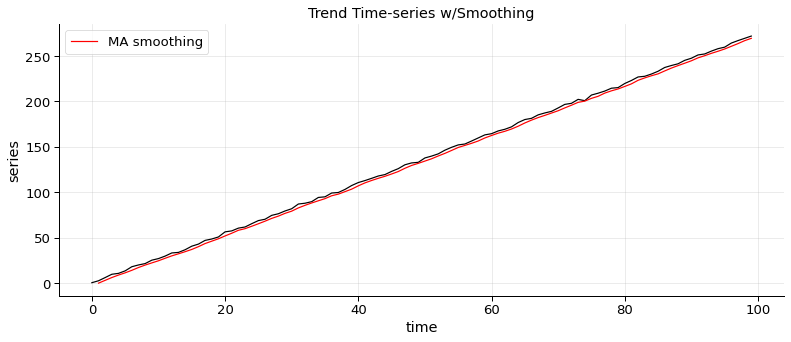

In [50]:
smoothed_trend= moving_average(trend)
plot_time_series(time, trend, title= "Trend Time-series w/Smoothing")
plt.plot(time[1:], np.insert(smoothed_trend, 0, 0), color= "red", label= "MA smoothing")
plt.legend()
plt.show()

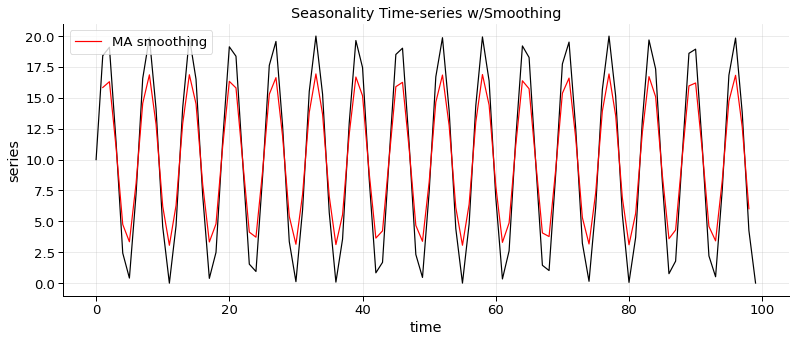

In [65]:
seasonality= 10 + np.sin(time) * 10
smoothed_seasonality= moving_average(seasonality)
plot_time_series(time, seasonality, title= "Seasonality Time-series w/Smoothing")
plt.plot(time[1:-1], smoothed_seasonality, label= "MA smoothing", color= "red")
plt.legend(loc= "upper left")
plt.show()

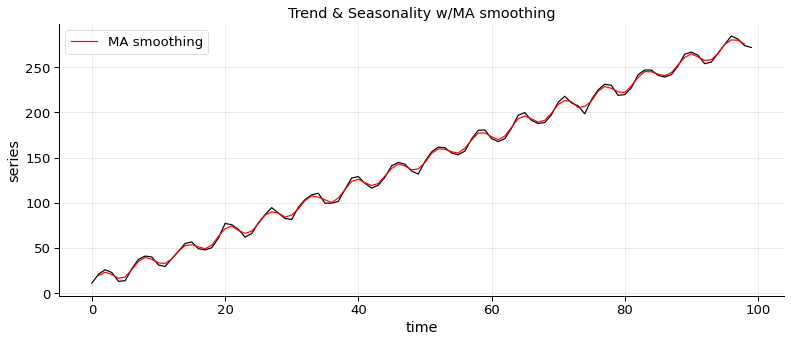

In [73]:
trend_seasonality= trend + seasonality + stationarity
smoothed_trend_seasonality= moving_average(trend_seasonality)
plot_time_series(time, trend_seasonality, title= "Trend & Seasonality w/MA smoothing")
plt.plot(time[1:-1], smoothed_trend_seasonality, color= "red", label= "MA smoothing")
plt.legend()
plt.show()